In [60]:
import pandas as pd
import numpy as np

In [40]:
#df_train = pd.read_csv('train_data.csv')

H:\New folder\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [61]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
Train = pd.read_csv("train_data.csv", parse_dates=['Date'], index_col='Date',date_parser=dateparse)
Test_val = pd.read_csv("test_data_hidden.csv", parse_dates=['Date'], index_col='Date',date_parser=dateparse)
Train=Train[['Store','Sales','Open','DayOfWeek']]
Test_val=Test_val[['Store','Sales','Open','DayOfWeek']]
print ('\n Parsed Data:')
Train.sort_values(['Date'],axis=0,inplace=True)
Test_val.sort_values(['Date'],axis=0,inplace=True)
print (Train.head())

H:\New folder\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-61-6e52c1a51125>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')



 Parsed Data:
            Store  Sales  Open  DayOfWeek
Date                                     
2013-01-01   1115      0     0          2
2013-01-01    379      0     0          2
2013-01-01    378      0     0          2
2013-01-01    377      0     0          2
2013-01-01    376      0     0          2


In [62]:
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

<ipython-input-65-1f8bca890c19>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(store1['Sales'], model='additive',freq=365)


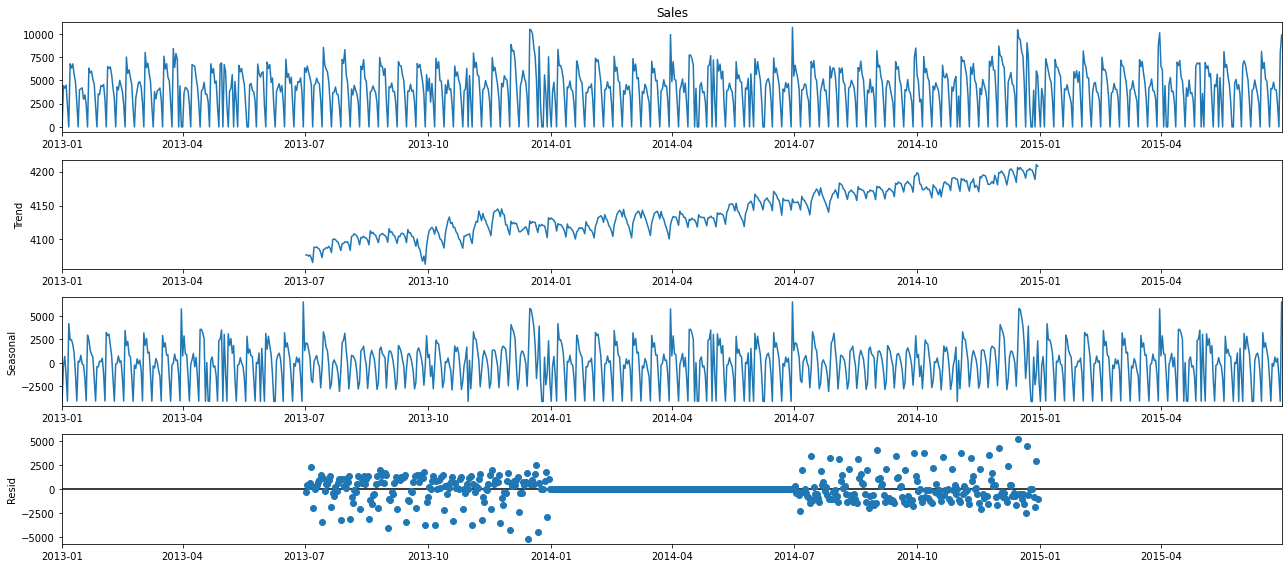

In [65]:
rcParams['figure.figsize'] = 18, 8
store1 = Train[Train['Store'] == 1]
decomposition = sm.tsa.seasonal_decompose(store1['Sales'], model='additive',freq=365)
fig = decomposition.plot()
plt.show()

In [41]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [42]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          982644 non-null  int64         
 1   DayOfWeek      982644 non-null  int64         
 2   Date           982644 non-null  datetime64[ns]
 3   Sales          982644 non-null  int64         
 4   Customers      982644 non-null  int64         
 5   Open           982644 non-null  int64         
 6   Promo          982644 non-null  int64         
 7   StateHoliday   982644 non-null  object        
 8   SchoolHoliday  982644 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 67.5+ MB


In [44]:
df_= df_train[['Date','Sales']]

In [46]:
df_.head()

,Date,Sales
0,2015-06-30,5735
1,2015-06-30,9863
2,2015-06-30,13261
3,2015-06-30,13106
4,2015-06-30,6635


In [50]:
df_.set_index('Date', inplace=True)

In [51]:
df_.head()

,Sales
Date,
2015-06-30,5735
2015-06-30,9863
2015-06-30,13261
2015-06-30,13106
2015-06-30,6635


In [52]:
import matplotlib.pyplot as plt

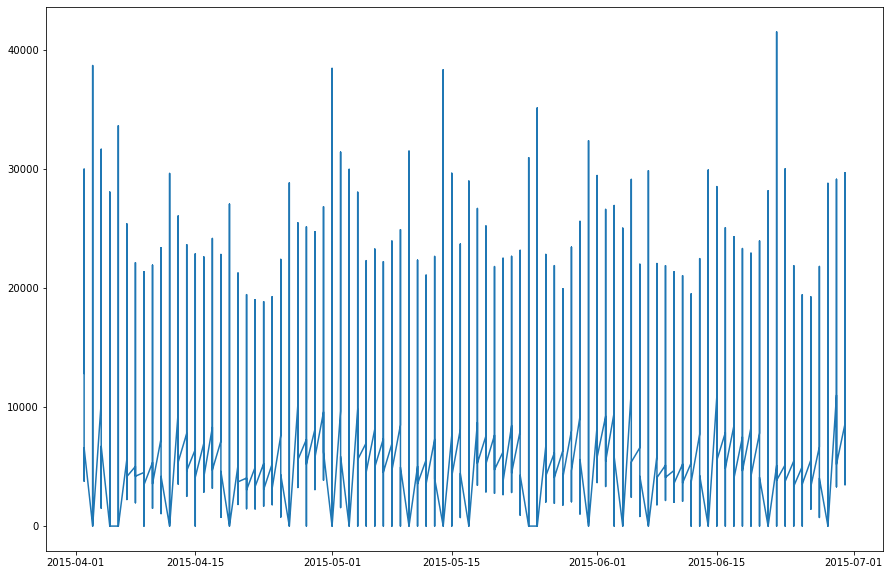

In [59]:
plt.figure(figsize=(15,10))
plt.plot(df_[:100000])